In [2]:
# importing the required libraries

import pandas as pd
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt  
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [4]:
# Reading data from remote link
url = 'http://bit.ly/w-data'
df = pd.read_csv(url, index_col=False)

In [5]:
# checking our data 
df.reset_index(drop=True)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [281]:
# checking for the null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [282]:
# looking for the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [283]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [284]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

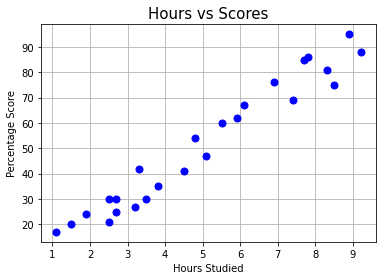

In [285]:
# Plotting the distribution of scores
plt.plot(df.Hours, df.Scores, 'bo', markersize=7)
plt.title('Hours vs Scores', fontsize=15)  
plt.xlabel('Hours Studied', fontsize=10)  
plt.ylabel('Percentage Score', fontsize=10)  
plt.grid()
plt.show()

In [286]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above graph and correlation matrix its quite evident that there is a positive linear relation between the number of hours studied and percentage of score.

### Using Simple Linear Regression
$$(y = \beta_o + \beta_1 x + e_i )$$

In [288]:
num = 0
den = 0
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [289]:
print(B1)


9.775803390787475


In [290]:
B0= mean_y - mean_x*B1
print(B0)


2.4836734053731746


In [291]:
df['predicted_Scores'] = B0 + B1*df['Hours'] # predicting scores
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

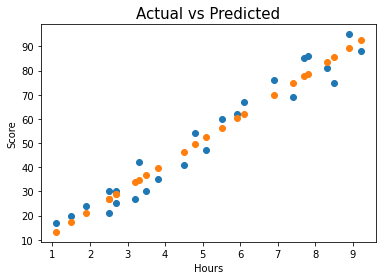

In [292]:
plt.title('Actual vs Predicted', fontsize=15)
plt.xlabel('Hours', fontsize=10)  
plt.ylabel( 'Score', fontsize=10)
plt.scatter(df['Hours'], df['Scores'])
plt.scatter(df['Hours'], df['predicted_Scores'])
plt.plot()

In [325]:
S = B0 + B1*9.25
print('Score at 9.25hr/day study will be', S)

Score at 9.25hr/day study will be 92.90985477015732


### Regression by Training and Testing Data

In [313]:
y=df[["Scores"]].values
X=df[["Hours"]].values

In [353]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)

In [354]:
#model creation
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression()

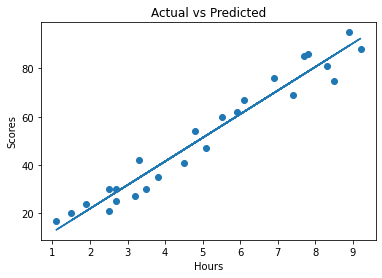

In [355]:

line = model.coef_*X+model.intercept_ # regression line

plt.scatter(X, y) # Plotting the regression line 
plt.plot(X, line)    # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [356]:
acc=model.score(X_test,y_test)  # Accuracy of algorithm
print("Accuracy of linear Regression is = {}".format(acc))

Accuracy of linear Regression is = 0.9568211104435257


In [357]:
print(X_test) # Testing data - In Hours


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [359]:
# Comparing Actual vs Predicted
y_pred = model.predict(X_test)

y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [360]:
# Predicting own data
pred = model.predict([[9.25]])
print("Score of student studies for 9.25 hrs/days is ", pred)

Score of student studies for 9.25 hrs/days is  [[92.91505723]]


In [362]:
#Checking accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
R^2 Score: 0.9568211104435257


### Conclusion:   

Both the models are predictiong near about same value.

Mean Absolute Error and $R^2$ score suggest reliablity in the result.